**1**.(20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy. (5 points)
2. Show that $A$ is positive-definite (5 points)
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system (10 points)

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A = np.array([[2,-1,1],[-1,2,-1],[1,-1,1]])
b = np.array([6,2,1]).reshape((-1,1))
print(A)
print(b)

[[ 2 -1  1]
 [-1  2 -1]
 [ 1 -1  1]]
[[6]
 [2]
 [1]]


In [3]:
np.all(la.eigvals(A) > 0)

True

In [4]:
p, l, u = la.lu(A)
y = la.solve_triangular(l, b, lower = True)
x = la.solve_triangular(u, y)
x

array([[ 5.],
       [ 3.],
       [-1.]])

**2**. (20 points)

Exact geometric solutions with $n = m$

- Find the equation of the line that passes through the points (2,1) and (3,7)
- Find the equation of the circle that passes through the points (1,7), (6,2) and (4,6)

Hint: The equation of a circle can be written as

$$
(x - a)^2 + (y - b)^2 = r^2
$$

In [5]:
# solve line y = kx + b

x = np.array([[2,1],[3,1]])
y = np.array([1,7]).reshape((-1,1))
k, b = la.solve(x,y)
k, b

(array([6.]), array([-11.]))

The line is $y=6x-11$

In [6]:
# first solve the center of circle (a, b)
P = np.array([[1,7],[6,2],[4,6]])
E = np.array([[1,1],[-1,0],[0,-1]])
x = (P.T @ E).T
y = np.sum((P**2).T @ E, 0).reshape((-1,1)) / 2
center = la.solve(x, y).reshape(-1)
print("center =", center)

# then solve r
r = la.norm(P[0] - center)
print("radius =", r)

center = [1. 2.]
radius = 5.0


The equation of the circle is $(x-1)^2+(y-2)^2=5^2$.

**3**. 20 points

- Load the matrix in `Q2.npy` - this consists of two columns representing the x and y coordinates of 10 points
- Find the equation of the circle that best fits these points
- Plot the points and fitted circle

Hint: You need to estimate the center of the circle and its radius.

In [8]:
P = np.load("Q2.npy")
n = len(P)
E = np.r_[np.ones(n - 1).reshape(1,-1), -np.identity(n - 1)]
x = (P.T @ E).T
y = np.sum((P**2).T @ E, 0).reshape((-1,1)) / 2

center = la.solve(x.T @ x, x.T @ y).reshape(-1)
r = np.sqrt(np.sum((P - center)**2, 1)).mean()
center, r

(array([ 0.00847695, -0.03091282]), 2.007072358939161)

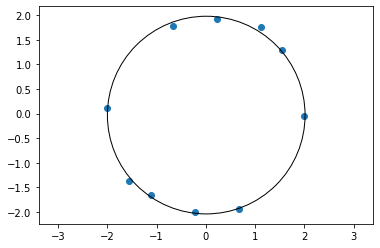

In [9]:
circle = plt.Circle(center, r, fill = False)
points = plt.scatter(P[:, 0], P[:, 1])
plt.gca().add_patch(circle)
plt.axis('equal')
pass

**4**. 20 points

The figure below shows the current population of Durham, Chapel Hill and Raleigh. Arrows show fractions that move between cities each year.

- What are the population sizes of the 3 cities after 3 years have passed?
- Find the steady state population of the 3 cities by solving a linear system.

Assume no births, deaths or any other fluxes other than those shown.

![img](Q3.png)

In [2]:
P = np.array([[0.5,0.2,0.3],[0.05,0.9,0.05],[0.2,0,0.8]]).T

In [3]:
v0 = np.array([8e4,3e5,5e5])
v3 = np.linalg.matrix_power(P, 3)@v0.reshape(-1,1)
v3

array([[186620.],
       [295480.],
       [397900.]])

In [4]:
# CH = a, D = b, R = c
A = np.eye(3) - P
A[-1, :] = np.ones(3)
pi = la.solve(A, np.array([0,0,1]))
pi

array([0.2, 0.4, 0.4])

**5** (20 points)

The file `Q5.npy` contains the x and y coordinates in cols 1 and 2 respectively. 

- Find a cubic polynomial model to fit the data using the normal equations
- Provide a geometric interpretation of the solution in terms of projection of a vector onto a space. What is the vector, what is the basis of the space, and what does the numerical solution you obtained represent?

In [13]:
data = np.load("Q5.npy")
x = data[:, 0]
y = data[:, 1]
A = np.c_[np.ones(len(x)), x, x**2, x**3]
betas = la.solve(A.T @ A, A.T @ y)
betas

array([-1.99235962, -1.02188927, -0.54438689,  0.99809019])

Considering the view of projection, the vector is $y$, the space is the column space of $A$, which is $C(A)$, the basis is $\{1,x,x^2,x^3\}$. The numerical solution means the coordinate of the projection of $y$ onto $C(A)$.